# PROJECT 2: 
## MODEL ANALYSIS PROJECT, Model Project

ProgEcon: Project 2

Group: Nikolaj Bysted and Fanny Troelsen Vindeløv

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import modelproject
from Worker import WorkerClass
from Government import GovernmentClass
worker = WorkerClass()
gov = GovernmentClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Labor supply

## 1.1 Numerical optimizer vs root-finder

__Summary of Findings:__ For all values of $\epsilon \in {1.0, 0.75, 0.5}$ the numerical optimizer and the root-finder produce nearly identical optimal labor supply when an interior solution exists. As $\epsilon$ decreases, the disutility of labor becomes weaker, leading to a higher optimal labor supply. At $\epsilon = 0.5$ the optimal labor supply reaches the upper bound, implying a boundary solution.

The utility and FOC plots support this result: when $\epsilon$ decreases, both the utility maximum and the point where the FOC equals zero move to higher levels of labor. When the solution lies on the boundary, the FOC does not cross zero within the feasible range, which is why the numerical optimizer performs better in this case, while the root-finder works well for interior solutions. Overall, both methods give the same optimal labor supply whenever an interior solution exists.

epsilon = 1.0
  ell* (optimizer):   8.265578
  ell* (root finder): 8.265578



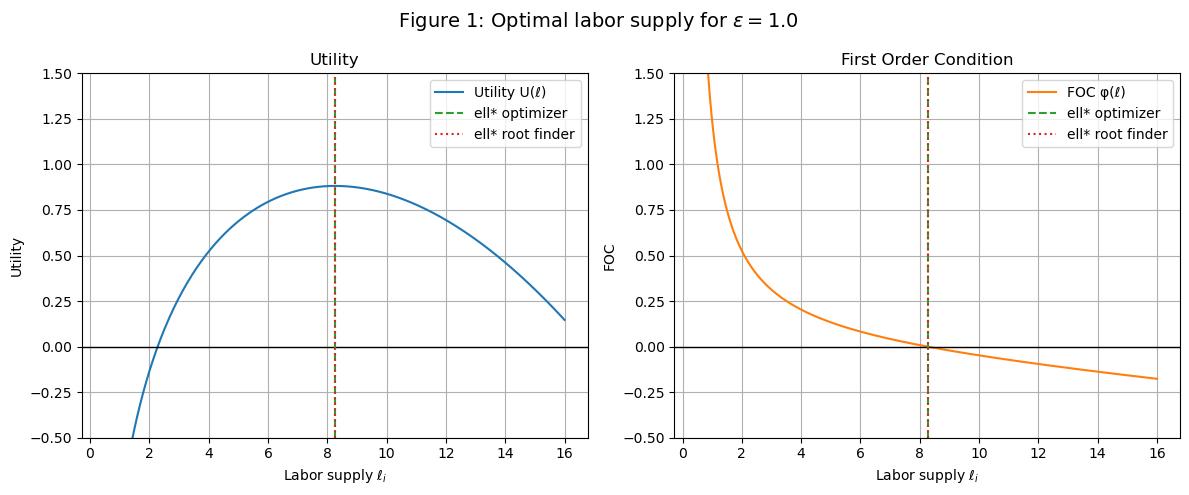

epsilon = 0.75
  ell* (optimizer):   11.136048
  ell* (root finder): 11.136048



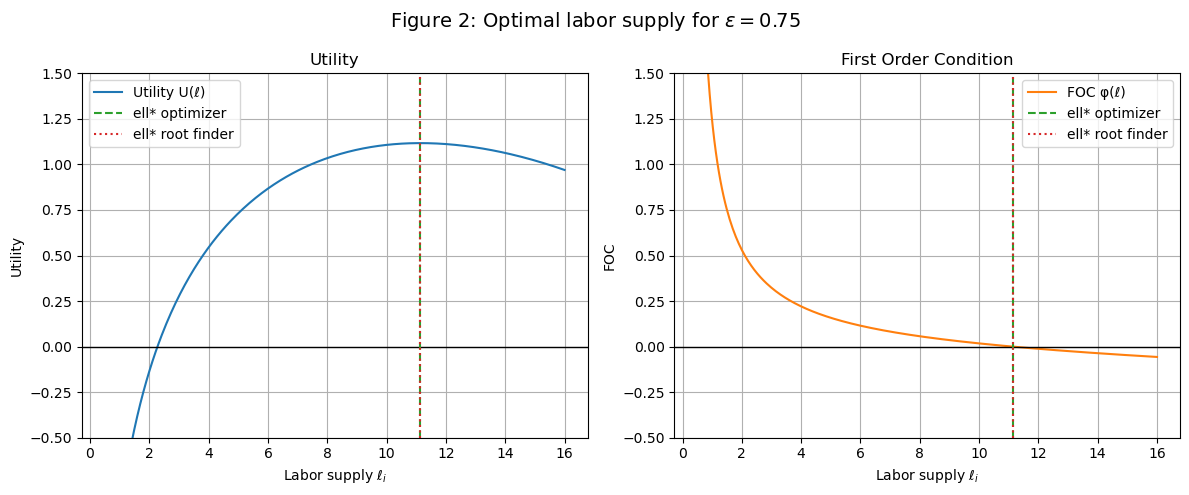

epsilon = 0.5
  ell* (optimizer):   15.999996
  ell* (root finder): 16.000000



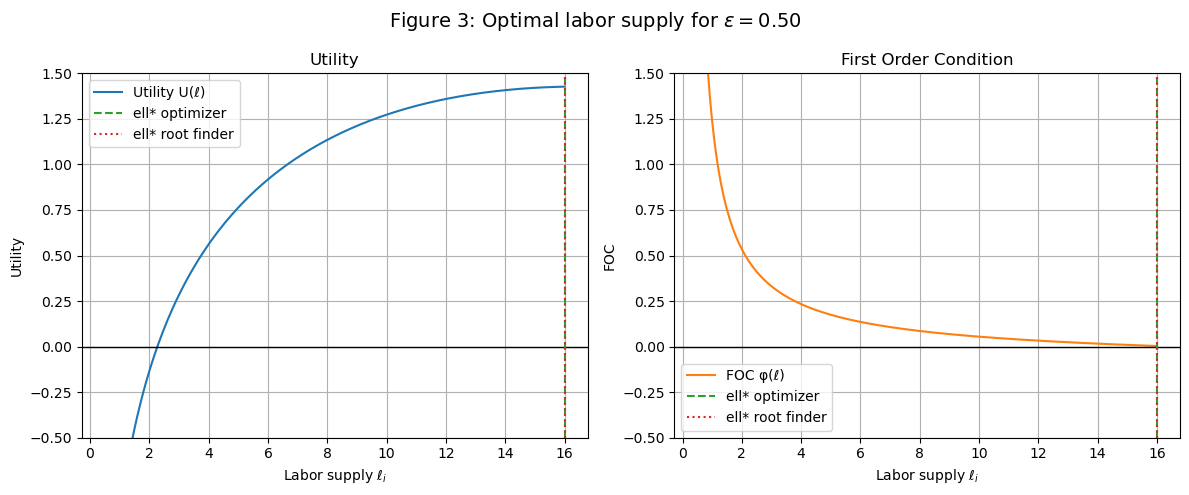

In [47]:
worker = WorkerClass()
p = 1.0

worker.plot_for_epsilon(1.0,  p, r' Figure 1: Optimal labor supply for $\epsilon = 1.0$')
worker.plot_for_epsilon(0.75, p, r'Figure 2: Optimal labor supply for $\epsilon = 0.75$')
worker.plot_for_epsilon(0.50, p, r'Figure 3: Optimal labor supply for $\epsilon = 0.50$')


## 1.2 Labor supply function

__Summary of Findings :__
Figure 4 shows that positive and negative lump-sum taxes affect labor supply in opposite directions, with a positive tax increasing hours worked and a negative tax reducing them.

Higher productivity increases the effective wage, generating both substitution and income effects. In this model, the income effect dominates, so labor supply varies only weakly with productivity. A positive lump-sum tax raises labor supply, especially for low-productivity workers, while a lump-sum transfer reduces labor supply through an income effect.


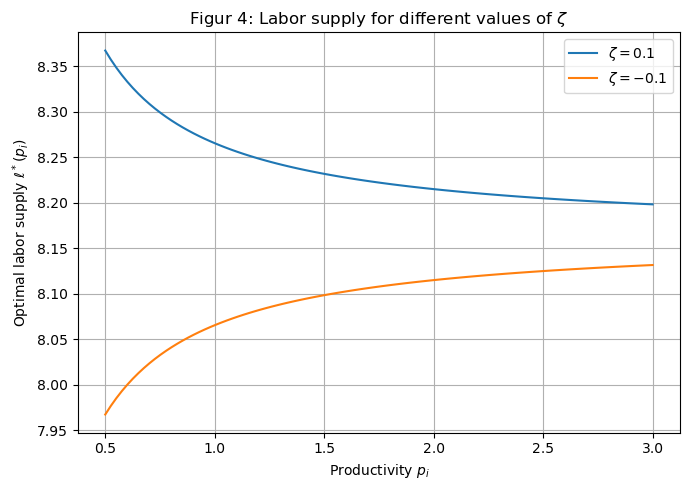

In [48]:
worker.plot_labor_supply(0.10, -0.10) 

# Part 2: Public good

## 2.1 Tax revenue and Social Welfare Function

__2.1.1:__

__Summary of Findings for 2.1.1:__ For $\tau = 0.50$ and $\zeta = 0.10$, we draw individual productivities, solve households’ labor supply decisions, and compute total tax revenue and social welfare. The resulting tax revenue is T=417.898, and the corresponding value of the social welfare function is SWF =174.045.

In [49]:
#2.1.1#

#from Government import GovernmentClass

gov = GovernmentClass()

# 1. Set parameters (given in the assignment)
gov.par.tau = 0.50
gov.par.zeta = 0.1

# 2. Draw productivities
gov.draw_productivities()

# 3. Solve labor supply for all workers
gov.solve_workers()

# 4. Compute tax revenue and SWF
T = gov.tax_revenue()
SWF = gov.SWF()

# 5. Print results
print(f"Tax revenue (T) = {T:.3f}")
print(f"Social Welfare Function (SWF) = {SWF:.3f}")

Tax revenue (T) = 417.898
Social Welfare Function (SWF) = 174.045


__2.1.2 and 2.1.3__ 

__Summary of Findings for 2.1.2 and 2.1.3:__

Tax revenue increases monotonically with the tax rate τ for all values of the lump-sum tax or transfer ζ. In contrast, social welfare is hump-shaped in τ, reflecting a trade-off between higher tax revenue and lower individual utility at higher tax rates.

For each value of ζ, there exists a unique welfare-maximizing tax rate. We find that the optimal tax rate decreases as ζ increases, with τ* ≈ 0.091 for ζ = −0.1, τ* ≈ 0.071 for ζ = 0.0, and τ* ≈ 0.051 for ζ = 0.1, indicating that higher lump-sum transfers reduce the need for distortionary taxation.


zeta = -0.1: tau* = 0.091, SWF* = 222.215
zeta = 0.0: tau* = 0.071, SWF* = 222.215
zeta = 0.1: tau* = 0.051, SWF* = 222.115


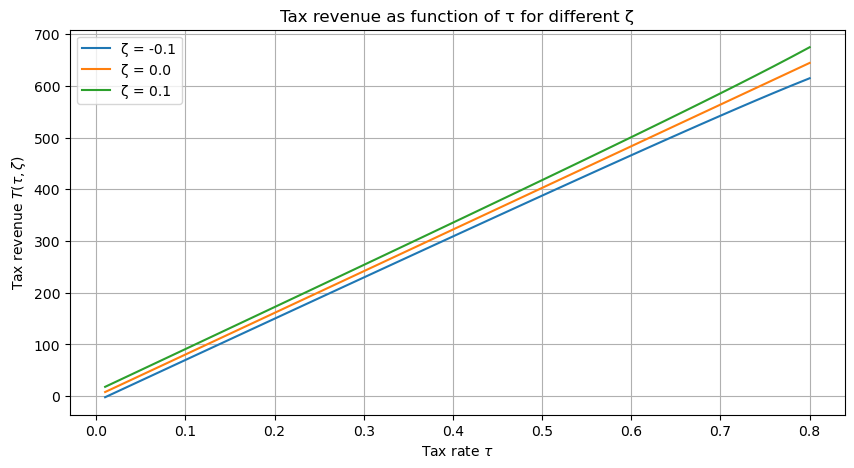

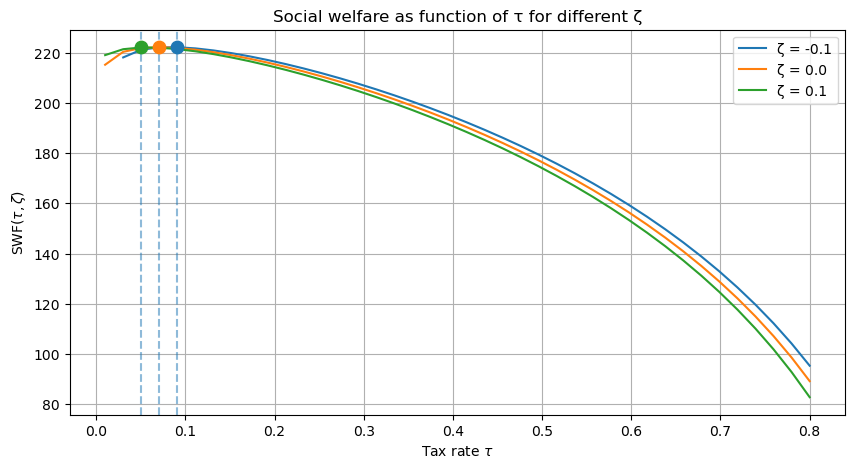

In [50]:
#2.1.2 and 2.1.3#

# Define values for lump-sum tax/transfer
zeta_values = [-0.1, 0.0, 0.1]

# Grid of tax rates τ
tau_int = np.linspace(0.01, 0.8, 40)

# Store tax revenue results
T_results = {z: [] for z in zeta_values}

# Store social welfare results
SWF_results = {z: [] for z in zeta_values}

# Loop over ζ
for z in zeta_values:
    # Loop over τ
    for tau in tau_int:
        # Initialize government
        gov = GovernmentClass()
        gov.par.tau = tau      # set tax rate
        gov.par.zeta = z       # set lump-sum tax

        gov.draw_productivities()
        gov.solve_workers()

        # Save tax revenue
        T_results[z].append(gov.tax_revenue())
        # Save social welfare
        SWF_results[z].append(gov.SWF())

# Dictionaries for optimal τ and SWF
tau_star = {}
SWF_star = {}

# Find welfare-maximizing τ for each ζ
for z in zeta_values:
    SWF_array = np.array(SWF_results[z])   # convert to array
    idx = np.nanargmax(SWF_array)           # index of max SWF

    tau_star[z] = tau_int[idx]              # optimal τ
    SWF_star[z] = SWF_array[idx]            # max SWF

    # Print results
    print(f"zeta = {z}: tau* = {tau_star[z]:.3f}, SWF* = {SWF_star[z]:.3f}")


# Plot tax revenue curves
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_int, T_results[z], label=f"ζ = {z}")  # T(τ,ζ)

plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"Tax revenue $T(\tau,\zeta)$")

plt.title("Tax revenue as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()

# Plot social welfare curves
plt.figure(figsize=(10,5))

for z in zeta_values:
    plt.plot(tau_int, SWF_results[z], label=f"ζ = {z}")  # SWF(τ,ζ)

    # Mark welfare maximum
    plt.scatter(
        tau_star[z],
        SWF_star[z],
        s=80,
        zorder=5
    )

    # Vertical line at optimal τ
    plt.axvline(
        tau_star[z],
        linestyle="--",
        alpha=0.5
    )

# Axis labels, title and legend
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"SWF($\tau,\zeta$)")
plt.title("Social welfare as function of τ for different ζ")
plt.legend()
plt.grid(True)
plt.show()


## 2.2 Optimal tax system

__2.2.1:__

__Summary of Findings:__ We jointly optimize the labor tax rate τ and the lump-sum tax or transfer ζ to maximize social welfare. The results show that the welfare-maximizing policy consists of a positive labor tax and a negative lump-sum transfer. We find τ* ≈ 0.137 and ζ* ≈ −0.524, yielding a maximum social welfare value of approximately 222.38.




In [51]:
from scipy.optimize import minimize
#import numpy as np
#from Government import GovernmentClass

# Objective: negative SWF
def obj_SWF(x):
    tau, zeta = x  # unpack parameters

    # Impose bounds manually
    if tau <= 0 or tau >= 1:
        return 1e12
    if zeta < -1 or zeta > 1:
        return 1e12

    # Initialize government
    gov = GovernmentClass()
    gov.par.tau = float(tau)
    gov.par.zeta = float(zeta)

    # Solve model
    gov.draw_productivities()
    gov.solve_workers()

    # Compute SWF
    SWF_val = gov.SWF()

    # Penalize invalid values
    if SWF_val is None or not np.isfinite(SWF_val):
        return 1e12

    return -SWF_val  # minimize negative SWF

# Initial guess
x_init = np.array([0.3, 0.0])

# Run optimization
result = minimize(
    obj_SWF,
    x0=x_init,
    method="Nelder-Mead",
    options={"maxiter": 3000, "xatol": 1e-6, "fatol": 1e-6}
)

# Extract optimum
tau_star, zeta_star = result.x

# Print results
print("Optimal tau* =", tau_star)
print("Optimal zeta* =", zeta_star)
print("Maximum SWF =", -result.fun)




Optimal tau* = 0.13678740594166816
Optimal zeta* = -0.5235271705940003
Maximum SWF = 222.38403246698252


__2.2.2:__

__Summary of Findings for 2.2.2:__ We solve the joint optimization problem for τ and ζ using multiple starting values to assess convergence. The results show that the optimizer converges to the same solution across all initial guesses. In particular, we consistently obtain τ* ≈ 0.137 and ζ* ≈ −0.524, indicating a unique and stable welfare-maximizing policy.


In [52]:
# Different starting values
start_points = [
    [0.1, -0.5],
    [0.3,  0.0],
    [0.6,  0.3],
    [0.8, -0.2]
]

solutions = []

for x0 in start_points:
    res = minimize(
        obj_SWF,
        x0=np.array(x0, dtype=float),
        method="Nelder-Mead",
        options={"maxiter": 3000}
    )

    solutions.append(res.x)
    print(f"Start {x0} -> tau* = {res.x[0]:.4f}, zeta* = {res.x[1]:.4f}")


# Check convergence
solutions = np.array(solutions)

tau_vals = solutions[:, 0]
zeta_vals = solutions[:, 1]

print("\nRange of solutions:")
print("tau*:  min =", tau_vals.min(), "max =", tau_vals.max())
print("zeta*: min =", zeta_vals.min(), "max =", zeta_vals.max())



Start [0.1, -0.5] -> tau* = 0.1368, zeta* = -0.5236
Start [0.3, 0.0] -> tau* = 0.1368, zeta* = -0.5235
Start [0.6, 0.3] -> tau* = 0.1367, zeta* = -0.5232
Start [0.8, -0.2] -> tau* = 0.1368, zeta* = -0.5235

Range of solutions:
tau*:  min = 0.13674224171227 max = 0.1367995572950169
zeta*: min = -0.5236368014622717 max = -0.5232413438290446


__2.2.3:__

__Summary of Findings for 2.2.3:__ We find that social welfare is maximized at the previously identified values of τ* and ζ*, confirming that the solution corresponds to a stable optimum rather than a boundary or numerical artifact.


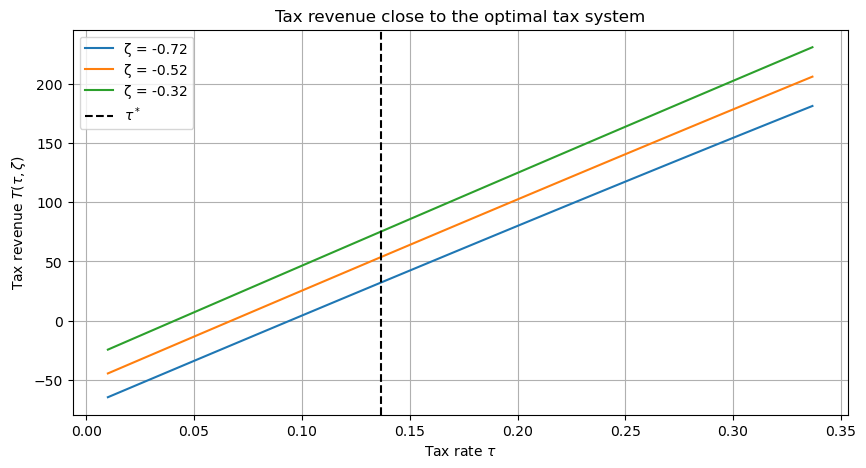

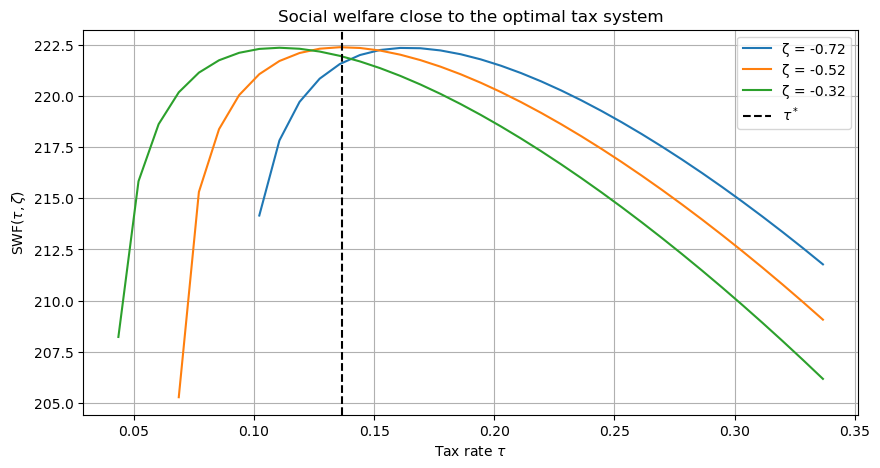

In [53]:
# Opgave 2.2.3

#import numpy as np
#import matplotlib.pyplot as plt
#from Government import GovernmentClass

# Local grid around optimal τ
tau_values = np.linspace(
    max(0.01, tau_star - 0.2),
    min(0.99, tau_star + 0.2),
    40
)

# Local values of ζ around optimum
zeta_values = [
    zeta_star - 0.2,
    zeta_star,
    zeta_star + 0.2
]

# Store results
T_results = {z: [] for z in zeta_values}
SWF_results = {z: [] for z in zeta_values}

# Loop over local (τ, ζ)
for z in zeta_values:
    for tau in tau_values:
        # Initialize government
        gov = GovernmentClass()
        gov.par.tau = tau
        gov.par.zeta = z

        # Solve model
        gov.draw_productivities()
        gov.solve_workers()

        # Save outcomes
        T_results[z].append(gov.tax_revenue())
        SWF_results[z].append(gov.SWF())

# Plot tax revenue locally
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, T_results[z], label=f"ζ = {z:.2f}")

plt.axvline(tau_star, linestyle="--", color="black", label=r"$\tau^*$")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"Tax revenue $T(\tau,\zeta)$")
plt.title("Tax revenue close to the optimal tax system")
plt.legend()
plt.grid(True)
plt.show()

# Plot social welfare locally
plt.figure(figsize=(10,5))
for z in zeta_values:
    plt.plot(tau_values, SWF_results[z], label=f"ζ = {z:.2f}")

plt.axvline(tau_star, linestyle="--", color="black", label=r"$\tau^*$")
plt.xlabel(r"Tax rate $\tau$")
plt.ylabel(r"SWF($\tau,\zeta$)")
plt.title("Social welfare close to the optimal tax system")
plt.legend()
plt.grid(True)
plt.show()


__2.2.4__ The Lorenz-curve of consumption

__Summary of Findings:__ The Lorenz curve for consumption at the welfare-maximizing tax system lies below the 45-degree line, indicating inequality in consumption across households. Despite redistribution through the optimal tax and transfer system, consumption remains unequally distributed which we acribe toheterogen productivity.


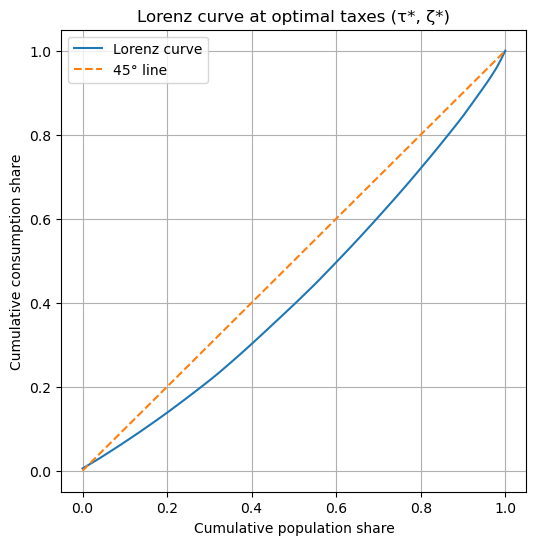

In [54]:
# Initialize government at optimal taxes
gov = GovernmentClass()
gov.par.tau = tau_star      # optimal τ
gov.par.zeta = zeta_star   # optimal ζ

# Solve model at optimum
gov.draw_productivities()
gov.solve_workers()

# Extract outcomes
pi = gov.sol.pi             # productivities
l = gov.sol.l               # labor supply

# Compute consumption
c = (1 - tau_star) * gov.par.w * pi * l - zeta_star

# Lorenz curve construction
c_sorted = np.sort(c)                       # sort consumption
cumsum_rel = np.cumsum(c_sorted) / np.sum(c_sorted)  # cumulative share
pop = np.linspace(0, 1, len(c))              # population share

# Plot Lorenz curve
plt.figure(figsize=(6,6))
plt.plot(pop, cumsum_rel, label="Lorenz curve")
plt.plot([0,1], [0,1], "--", label="45° line")
plt.xlabel("Cumulative population share")
plt.ylabel("Cumulative consumption share")
plt.title("Lorenz curve at optimal taxes (τ*, ζ*)")
plt.legend()
plt.grid(True)
plt.show()


# 3. Top tax

## 3.1 Labor supply

__Summary of Findings :__

For all values of p, the numerical optimizer and the four-step FOC method yield the same optimal labor supply.
The utility function has a single interior maximum, and the FOC crosses zero at exactly this point.
In all cases, the optimal labor supply lies below the top-tax kink, so the pre–top-tax FOC determines the solution. After the kink, the FOC is strictly negative, implying no interior optimum in that region.
Thus, while the top tax changes the shape of the FOC, it does not affect the optimal labor choice.

As p increases, the optimal labor supply decreases, reflecting weaker labor incentives due to a higher effective tax burden, while the top tax itself does not change the location of the optimum.

ℓ* (optimizer) = 7.867351555, U = 1.525675165
ℓ* (4-step FOC) = 7.867351564, U = 1.525675165


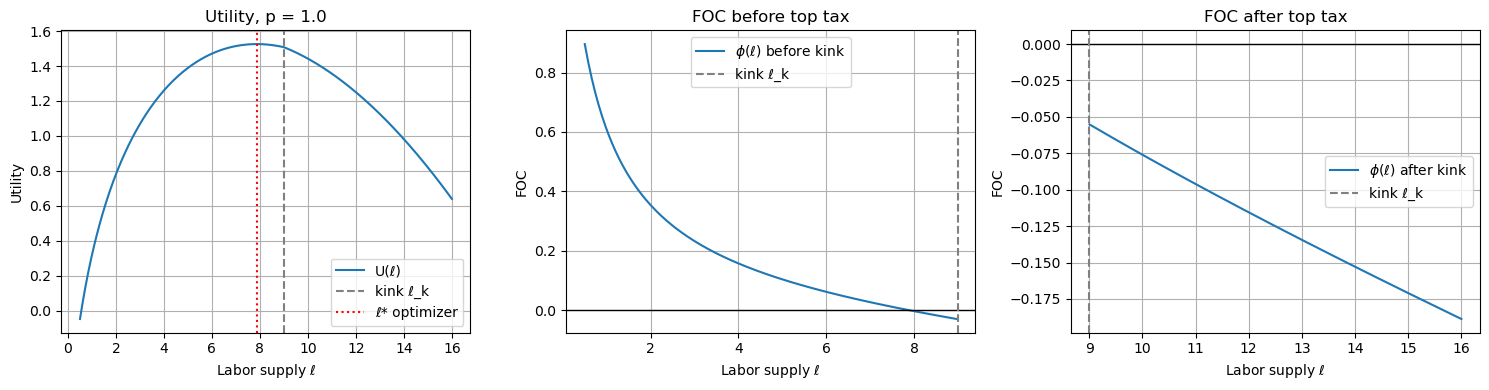

ℓ* (optimizer) = 7.659573629, U = 1.675326205
ℓ* (4-step FOC) = 7.659574468, U = 1.675326211


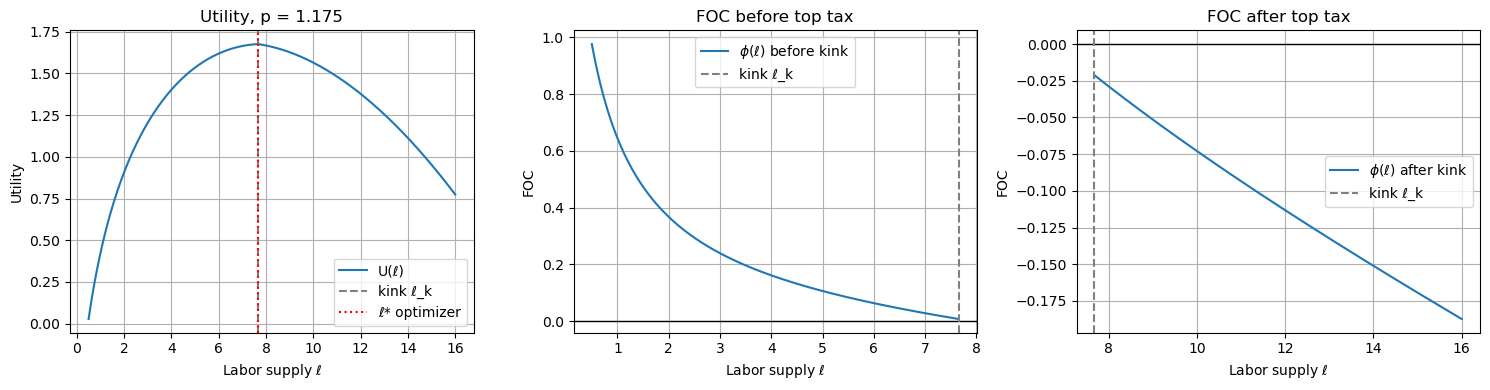

ℓ* (optimizer) = 7.080244309, U = 1.861228319
ℓ* (4-step FOC) = 7.080243588, U = 1.861228319


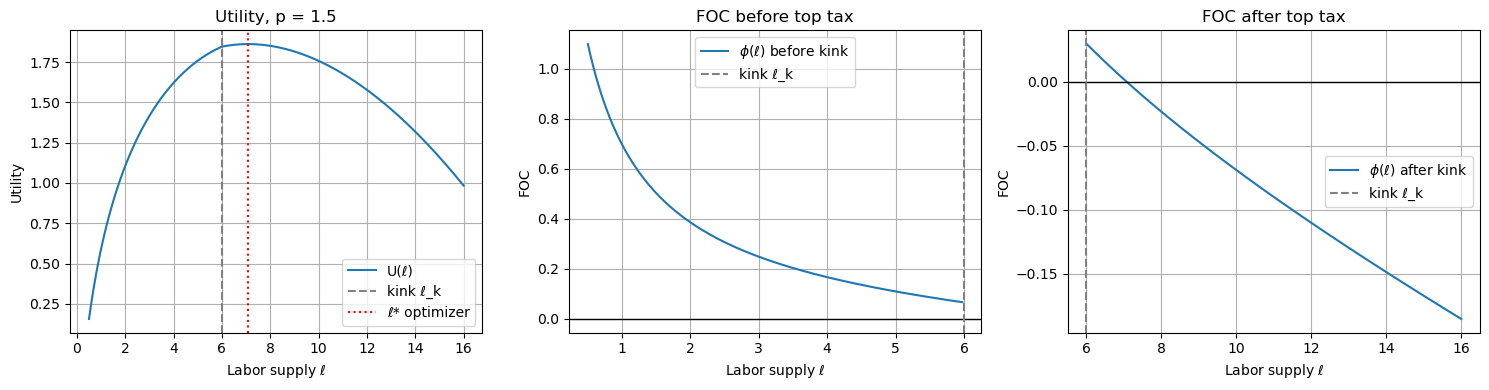

In [55]:
#from Worker import WorkerClass
worker = WorkerClass()


worker.par.tau_star = tau_star
worker.par.zeta_star = zeta_star


worker.plot_top_tax(1.0)
worker.plot_top_tax(1.175)
worker.plot_top_tax(1.5)

## 3.2 Labor supply function

__Summary of Findings :__

Labor supply increases with productivity. Almost no one chooses the before-kink solution, a small share works Optimal labor supply increases with productivity but shows a discrete drop around the top-tax kink due to the higher marginal tax rate. 

Consumption rises monotonically with productivity, with a clear flattening near the kink reflecting reduced after-tax returns.

Most workers choose the after-kink region (68%), while smaller shares locate before the kink (26%) or exactly at it (06%), indicating localized behavioral effects of the top tax.

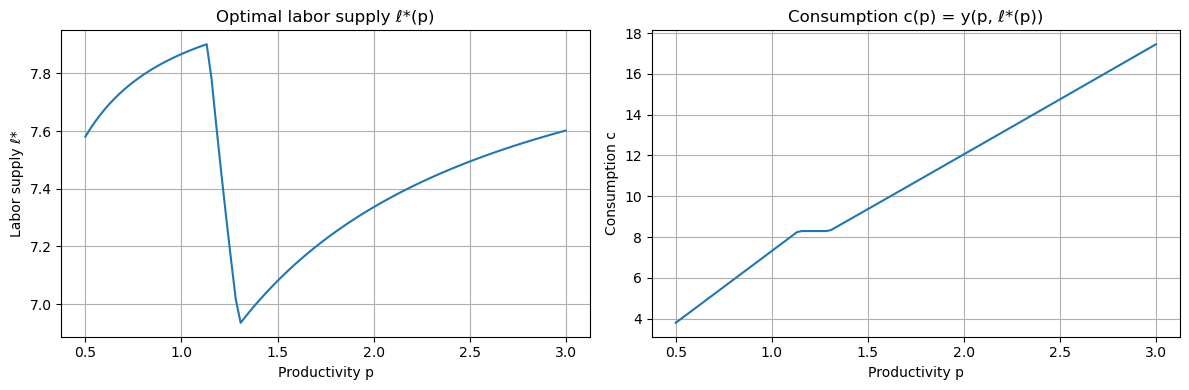

Share with ℓ* = ℓ^b (before kink): 0.260
Share with ℓ* = ℓ^k (at kink):      0.060
Share with ℓ* = ℓ^a (after kink):   0.680


In [56]:
worker.plot_labor_and_consumption_top()
share_b, share_k, share_a = worker.region_proportions_top()

## 3.3 Public good

__Summary of Findings :__

Introducing the top tax (κ = 9, ω = 0.2) increases government revenue but reduces social welfare. While revenue rises , social welfare falls by roughly 0.45. This is implying that the efficiency losses from the top tax dominate the welfare gains from higher public funds. Consequently, under the given parameters, the top tax lowers overall social welfare compared to the no–top-tax benchmark.

The Lorenz curve for consumption shifts slightly closer to the 45-degree line, indicating a modest reduction in consumption inequality.

The best policy on the grid features a low top tax rate and a high cutoff (ω ≈ 0.04, κ ≈ 12.9), yielding a small but positive welfare gain (ΔSWF ≈ +0.003) relative to the no–top-tax benchmark. This indicates that only very mild top taxation applied to a narrow upper tail can improve social welfare in this model, whereas more aggressive top taxes reduce welfare.

=== 3.3.1: SWF effect of introducing top tax (kappa=9, omega=0.2) ===
No top tax:     SWF = 222.384032,  G = 53.800787
With top tax:   SWF = 221.933718,  G = 54.911046
Change:         ΔSWF = -0.450314,  ΔG = 1.110260


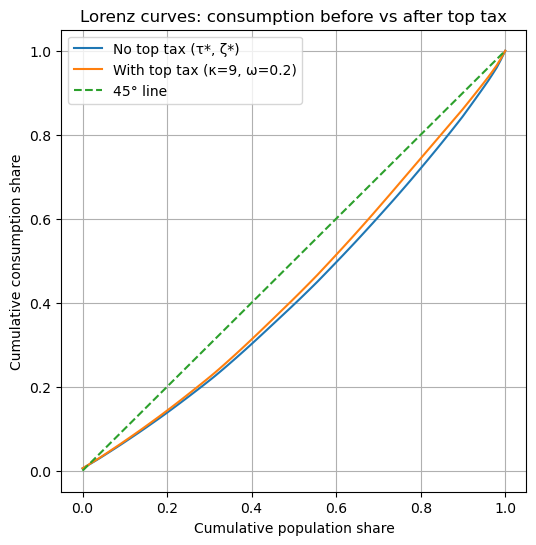

Baseline (no top tax): SWF0 = 222.384032, G0 = 53.800787
Best top tax on grid:  SWF  = 222.384323, G  = 53.998026
at omega = 0.0667, kappa = 13.0000
Improvement: ΔSWF = 0.000291
 Found (omega, kappa) that IMPROVES SWF.


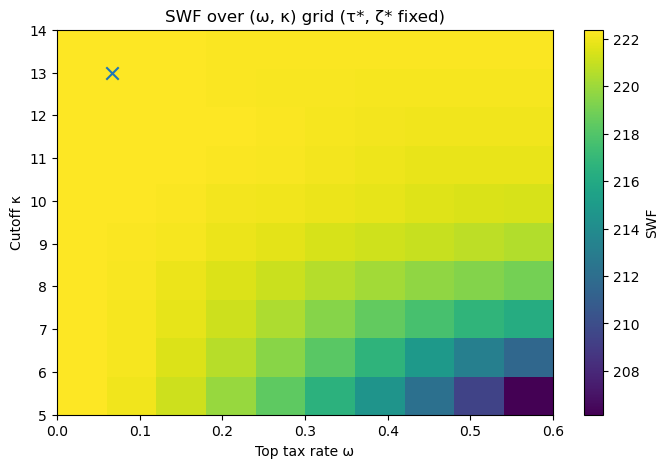

In [57]:
#from Worker import WorkerClass
#from Government import GovernmentClass

# ---------- 0) Draw ONE fixed productivity sample (same for all comparisons) ----------
gov = GovernmentClass()
gov.draw_productivities()
pi_draw = gov.sol.pi.copy()


N   = gov.par.N
w   = gov.par.w
chi = gov.par.chi
eta = gov.par.eta


def lorenz_curve(x):
    #Return population shares and cumulative shares for Lorenz curve.
    x = np.asarray(x)
    x = np.maximum(x, 0.0)
    xs = np.sort(x)
    cum = np.cumsum(xs)
    if cum[-1] == 0:
        pop = np.linspace(0, 1, len(xs))
        return pop, pop  # degenerate
    L = cum / cum[-1]
    pop = np.linspace(0, 1, len(xs))
    return pop, L

def eval_no_top_tax(pi, tau, zeta):
    #Economy evaluation WITHOUT top tax using GovernmentClass' worker-solver.
    gov = GovernmentClass()
    gov.sol.pi = pi.copy()
    gov.par.tau = float(tau)
    gov.par.zeta = float(zeta)

    gov.solve_workers()

    # revenue and SWF from your GovernmentClass
    G = gov.tax_revenue()
    swf = gov.SWF()

    # consumption under baseline (no top tax)
    c = (1 - tau) * w * gov.sol.pi * gov.sol.l - zeta
    return swf, G, c, gov.sol.l, gov.sol.U

def eval_top_tax(pi, tau_star, zeta_star, kappa, omega, use_foc=False):
    # Economy evaluation WITH top tax. We solve each worker using WorkerClass' top-tax methods (already in your Worker.py).
    
    worker = WorkerClass()
    worker.par.tau_star = float(tau_star)
    worker.par.zeta_star = float(zeta_star)
    worker.par.kappa = float(kappa)
    worker.par.omega = float(omega)

    ell = np.zeros_like(pi)
    U   = np.zeros_like(pi)
    c   = np.zeros_like(pi)

    for i, p in enumerate(pi):
        opt = worker.optimal_choice_top_FOC(p) if use_foc else worker.optimal_choice_top(p)
        ell[i] = opt.ell
        c[i]   = opt.c
        U[i]   = opt.U

    pre_tax = w * pi * ell
    top_base = np.maximum(pre_tax - kappa, 0.0)

    # tax revenue: T = N*zeta + sum(tau*pre_tax + omega*top_base)
    G = N * zeta_star + np.sum(tau_star * pre_tax + omega * top_base)

    # SWF = chi*G^eta + sum(U)
    swf = np.nan if (G < 0) else chi * (G ** eta) + np.sum(U)

    return swf, G, c, ell, U

# ============================================================
# 3.3.1) SWF change when introducing the top tax (kappa=9, omega=0.2)
# ============================================================

# baseline: no top tax, but at (tau*, zeta*)
SWF0, G0, c0, ell0, U0 = eval_no_top_tax(pi_draw, tau_star, zeta_star)

# top tax baseline parameters from assignment text
kappa0 = 9.0
omega0 = 0.20
SWF1, G1, c1, ell1, U1 = eval_top_tax(pi_draw, tau_star, zeta_star, kappa0, omega0, use_foc=False)

print("=== 3.3.1: SWF effect of introducing top tax (kappa=9, omega=0.2) ===")
print(f"No top tax:     SWF = {SWF0:.6f},  G = {G0:.6f}")
print(f"With top tax:   SWF = {SWF1:.6f},  G = {G1:.6f}")
print(f"Change:         ΔSWF = {SWF1-SWF0:.6f},  ΔG = {G1-G0:.6f}")

# ============================================================
#  Lorenz curve change (consumption) when introducing top tax
# ============================================================

pop0, L0 = lorenz_curve(c0)
pop1, L1 = lorenz_curve(c1)

plt.figure(figsize=(6,6))
plt.plot(pop0, L0, label="No top tax (τ*, ζ*)")
plt.plot(pop1, L1, label="With top tax (κ=9, ω=0.2)")
plt.plot([0,1],[0,1],'--', label="45° line")
plt.xlabel("Cumulative population share")
plt.ylabel("Cumulative consumption share")
plt.title("Lorenz curves: consumption before vs after top tax")
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
# Grid search for (omega, kappa) that improves SWF
# (tau_star, zeta_star fixed)
# ============================================================

# Baseline SWF without top tax (at tau_star, zeta_star)
SWF0, G0, c0, ell0, U0 = eval_no_top_tax(pi_draw, tau_star, zeta_star)

# Constraint: omega < 1 - tau_star
omega_max = 1.0 - tau_star - 1e-8
if omega_max <= 0:
    raise ValueError(f"omega_max <= 0 because tau_star={tau_star:.4f}. Need tau_star < 1.")

# Choose grids (we have set the grid size to 10x10 for faster execution)
omega_grid = np.linspace(0.0, min(0.6, omega_max), 10)   
kappa_grid = np.linspace(5.0, 14.0, 10)                 

best = {"SWF": -np.inf, "omega": None, "kappa": None, "G": None}
SWF_grid = np.full((len(kappa_grid), len(omega_grid)), np.nan)

for iK, kappa in enumerate(kappa_grid):
    for iO, omega in enumerate(omega_grid):
        swf, G, *_ = eval_top_tax(pi_draw, tau_star, zeta_star, kappa, omega, use_foc=False)
        SWF_grid[iK, iO] = swf

        if np.isfinite(swf) and swf > best["SWF"]:
            best.update({"SWF": swf, "omega": omega, "kappa": kappa, "G": G})


print(f"Baseline (no top tax): SWF0 = {SWF0:.6f}, G0 = {G0:.6f}")
print(f"Best top tax on grid:  SWF  = {best['SWF']:.6f}, G  = {best['G']:.6f}")
print(f"at omega = {best['omega']:.4f}, kappa = {best['kappa']:.4f}")
print(f"Improvement: ΔSWF = {best['SWF'] - SWF0:.6f}")

if best["SWF"] > SWF0:
    print(" Found (omega, kappa) that IMPROVES SWF.")
else:
    print(" No (omega, kappa) on this grid improves SWF (try expanding the grid).")

# Plot heatmap to see where SWF is high
plt.figure(figsize=(8,5))
plt.imshow(
    SWF_grid,
    aspect='auto',
    origin='lower',
    extent=[omega_grid.min(), omega_grid.max(), kappa_grid.min(), kappa_grid.max()]
)
plt.colorbar(label="SWF")
plt.scatter([best["omega"]], [best["kappa"]], marker="x", s=80)
plt.xlabel("Top tax rate ω")
plt.ylabel("Cutoff κ")
plt.title("SWF over (ω, κ) grid (τ*, ζ* fixed)")
plt.show()





# 4. Extension

This extension introduces heterogeneous labor disutility by allowing individuals to differ in their preference for work. Specifically, individual labor disutility parameters are drawn as

$$
\nu_i \sim \text{LogNormal}\big(\log(\nu),\, \sigma_\nu\big),
$$

so that the benchmark model with a common disutility $(\nu)$ is nested as the special case $\sigma_\nu = 0$. Throughout the extension, the dispersion parameter is set to $\sigma_\nu = 0.5$, which generates substantial but plausible heterogeneity in labor disutility around the benchmark value.

Labor supply in the no–top-tax baseline is kept as in the benchmark model, while heterogeneity affects both labor supply and welfare under the top tax.

__Summary of Findings :__

With heterogeneous labor disutility, introducing a top tax increases social welfare $\Delta \text{SWF} \approx 6.2$
. The welfare gain is driven by higher tax revenue and a reduction in excessive labor supply among individuals with high disutility of work, in contrast to the homogeneous benchmark where the same top tax slightly reduced welfare.


In [59]:
# Heterogeneity strength parameter
sigma_nu = 0.50  

# Draw individual labor disutility parameters (median equals baseline nu)
nu_draw = gov.rng.lognormal(mean=np.log(gov.par.nu), sigma=sigma_nu, size=len(pi_draw))

def eval_no_top_tax(pi, tau, zeta, nu_i=None):
    # Baseline economy without top tax. Labor supply is solved as in the benchmark model (homogeneous preferences)
    gov = GovernmentClass()
    gov.sol.pi = pi.copy()
    gov.par.tau = float(tau)
    gov.par.zeta = float(zeta)

    gov.solve_workers()  

    # Extension: Welfare is evaluated using heterogeneous labor disutility, while keeping labor supply fixed
    if nu_i is None:
        nu_i = np.full_like(pi, gov.par.nu, dtype=float)

    c = (1 - tau) * w * gov.sol.pi * gov.sol.l - zeta
    U = np.log(np.maximum(c, 1e-12)) - nu_i * gov.sol.l**(1 + gov.par.epsilon) / (1 + gov.par.epsilon)
    gov.sol.U = U  # overwrite utility used in SWF

    G = gov.tax_revenue()
    swf = gov.SWF()
    return swf, G, c, gov.sol.l, gov.sol.U


def eval_top_tax(pi, tau_star, zeta_star, kappa, omega, nu_i=None, use_foc=False):
    
    # Economy with top tax. Heterogeneous labor disutility affects both labor supply and welfare
    if nu_i is None:
        nu_i = np.full_like(pi, 0.015, dtype=float)  # fallback if not provided

    worker = WorkerClass()
    worker.par.tau_star = float(tau_star)
    worker.par.zeta_star = float(zeta_star)
    worker.par.kappa = float(kappa)
    worker.par.omega = float(omega)

    ell = np.zeros_like(pi)
    U   = np.zeros_like(pi)
    c   = np.zeros_like(pi)

    # Extension individual-specific labor disutility
    for i, p in enumerate(pi):
        worker.par.nu = float(nu_i[i])   
        opt = worker.optimal_choice_top_FOC(p) if use_foc else worker.optimal_choice_top(p)
        ell[i] = opt.ell
        c[i]   = opt.c
        U[i]   = opt.U

    # Tax base and revenue under top tax
    pre_tax = w * pi * ell
    top_base = np.maximum(pre_tax - kappa, 0.0)

    # Social welfare
    G = N * zeta_star + np.sum(tau_star * pre_tax + omega * top_base)
    swf = np.nan if (G < 0) else chi * (G ** eta) + np.sum(U)

    return swf, G, c, ell, U

# ------------------------------------------------------------
# Evaluate welfare with and without top tax under heterogeneity
# ------------------------------------------------------------
SWF0, G0, c0, ell0, U0 = eval_no_top_tax(pi_draw, tau_star, zeta_star, nu_i=nu_draw)
SWF1, G1, c1, ell1, U1 = eval_top_tax(pi_draw, tau_star, zeta_star, kappa0, omega0, nu_i=nu_draw, use_foc=False)

print("EXTENSION: Heterogeneous labor disutility")
print(f"No top tax:   SWF = {float(SWF0):.3f},  G = {float(G0):.3f}")
print(f"With top tax: SWF = {float(SWF1):.3f},  G = {float(G1):.3f}")
print(f"Change:       ΔSWF = {float(SWF1 - SWF0):+.3f},  ΔG = {float(G1 - G0):+.3f}")




EXTENSION: Heterogeneous labor disutility
No top tax:   SWF = 216.222,  G = 53.801
With top tax: SWF = 223.159,  G = 65.095
Change:       ΔSWF = +6.937,  ΔG = +11.294
